## 1. Text model classification
### Imports and loading features.csv for train, validation, test

In [120]:
import os 
%pip install scikit-learn
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
%pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
%pip install scikit-learn matplotlib seaborn joblib 
import matplotlib.pyplot as plt
import seaborn as sns
 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [174]:
# Load your data with extracted features
df_train = pd.read_csv('text_features_train.csv')
df_val = pd.read_csv('text_features_valid.csv')  # Make sure you've extracted features for validation too
df_test = pd.read_csv('text_features_test.csv')

print(f"Train shape: {df_train.shape}")
print(f"Validation shape: {df_val.shape}") 
print(f"Test shape: {df_test.shape}") 

Train shape: (74111, 106)
Validation shape: (19156, 106)
Test shape: (23540, 106)


## Clean data, prepare training and validation data

In [175]:
# print(f"Train - before: {df_train.shape}, missing da_tags: {df_train['da_tag'].isna().sum()}")
# print(f"Validation - before: {df_val.shape}, missing da_tags: {df_val['da_tag'].isna().sum()}")

# print(f"Train - after: {df_train.shape}")
# print(f"Validation - after: {df_val.shape}")

# Separate features and target
# Assuming 'transcript' and 'da_tag' are in your dataframe
# All other columns are features (104 total: 75 LIWC + 29 NLTK)

# Drop non-feature columns
feature_columns = [col for col in df_train.columns if col not in ['transcript', 'da_tag']]
print(f"\nNumber of features: {len(feature_columns)}")

# Prepare training data
X_train = df_train[feature_columns]
y_train = df_train['da_tag']

# Prepare validation data
X_val = df_val[feature_columns]
y_val = df_val['da_tag']  

# Prepare the test data (no y vals given)
X_test = df_test[feature_columns]

# print(f"\nTesting target classes: {y_train.unique()}")
# print(f"Class distribution in training set:")
# print(y_train.value_counts())


Number of features: 104


In [187]:
# fill in any missing values with 0
X_train = X_train.fillna(0) #x_training set
X_val = X_val.fillna(0) #x_validation set
X_test = X_test.fillna(0)

print("\n" + "="*60)
print("training random forest classifier")
print("="*60)

# initialize random forest w sklearn
rf_classifier_text = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=30,            # Maximum depth of trees
    min_samples_split=5,     # Minimum samples to split a node
    min_samples_leaf=2,      # Minimum samples in leaf node
    random_state=42,          
    n_jobs=-1,                
    verbose=1                # Show progress
)

# Train the model on training data
print("\n training random forest classifier model...")
rf_classifier_text.fit(X_train, y_train)
print("Training complete!")


training random forest classifier

 training random forest classifier model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s


Training complete!


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


### Measure performance of random forest classifier


Performance on validation set

Accuracy: 0.8227 (82.27%)
F1 Score (macro): 0.5777

Classification Report:
              precision    recall  f1-score   support

           %       0.69      0.59      0.64      1033
          aa       0.65      0.28      0.39       664
           b       0.75      0.96      0.84      2409
          ba       0.78      0.65      0.71       320
          fc       0.85      0.45      0.59       121
          ny       0.45      0.02      0.05       206
          qy       0.81      0.25      0.39       342
          sd       0.73      0.91      0.81      5122
          sv       0.58      0.27      0.37      1765
           x       0.99      1.00      0.99      7174

    accuracy                           0.82     19156
   macro avg       0.73      0.54      0.58     19156
weighted avg       0.81      0.82      0.80     19156


Generating matrices

Original Confusion Matrix (raw counts):
[[ 613    9  147    6    0    0    5  226   12   15]
 [  20  189  378   

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished



Normalized Confusion Matrix (over predicted/columns):
[[6.88764045e-01 3.07167235e-02 4.77427736e-02 2.24719101e-02
  0.00000000e+00 0.00000000e+00 4.67289720e-02 3.54676711e-02
  1.47239264e-02 2.06696982e-03]
 [2.24719101e-02 6.45051195e-01 1.22767132e-01 4.86891386e-02
  0.00000000e+00 9.09090909e-02 9.34579439e-03 7.84682988e-03
  1.22699387e-02 2.75595976e-04]
 [2.35955056e-02 1.56996587e-01 7.52517051e-01 2.24719101e-02
  6.15384615e-02 3.63636364e-01 0.00000000e+00 4.70809793e-04
  1.22699387e-03 9.64585917e-04]
 [1.01123596e-02 6.14334471e-02 4.54693082e-03 7.75280899e-01
  3.07692308e-02 9.09090909e-02 0.00000000e+00 5.02197112e-03
  2.82208589e-02 1.92917183e-03]
 [4.49438202e-03 3.41296928e-03 3.89736928e-03 1.87265918e-02
  8.46153846e-01 0.00000000e+00 0.00000000e+00 2.98179535e-03
  3.68098160e-03 3.03155574e-03]
 [2.24719101e-03 1.36518771e-02 6.26826892e-02 0.00000000e+00
  0.00000000e+00 4.54545455e-01 0.00000000e+00 3.13873195e-04
  0.00000000e+00 0.00000000e+00]
 [1

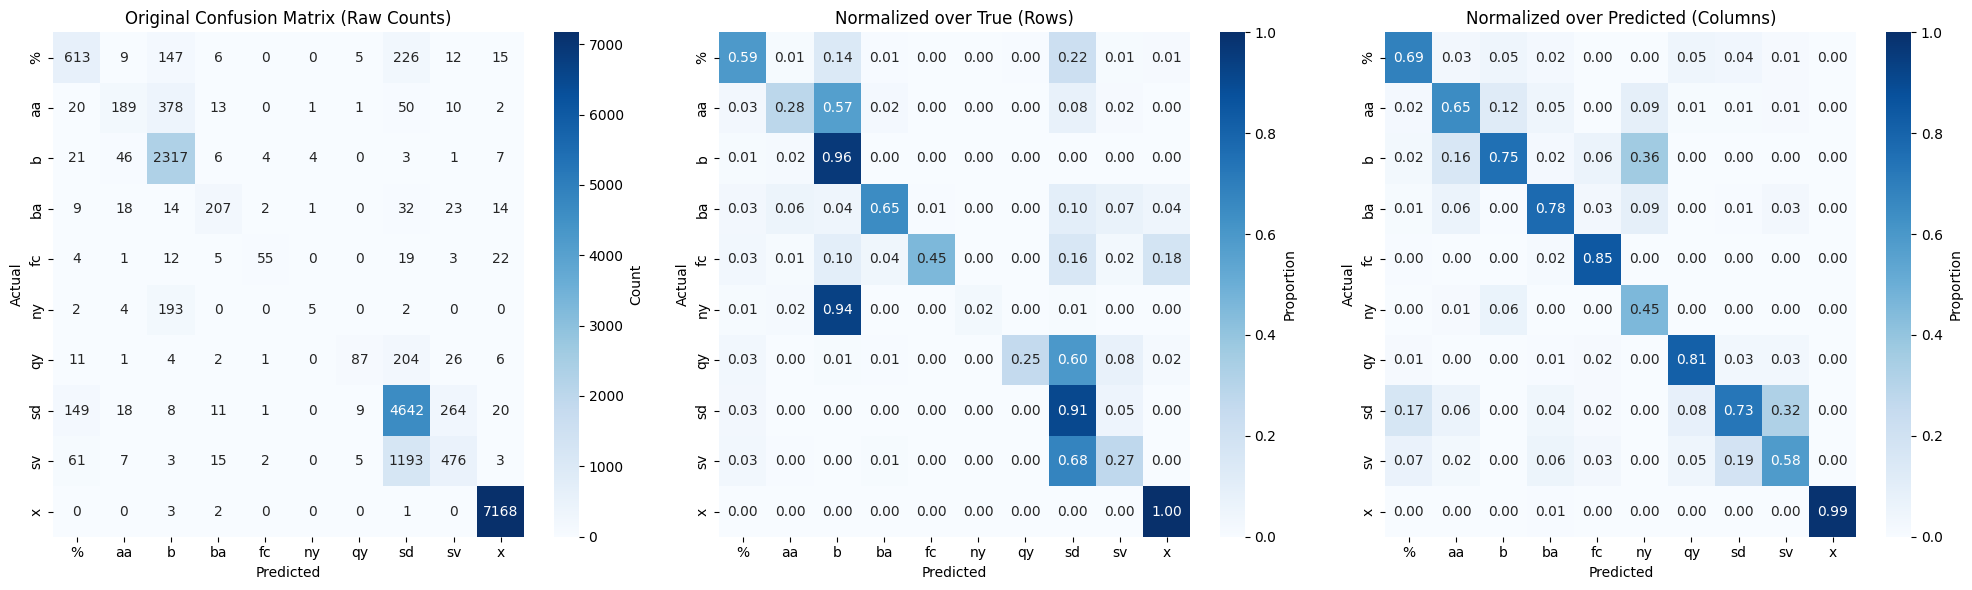

In [191]:
print("\n" + "="*60)
print("Performance on validation set")
print("="*60)

y_val_pred = rf_classifier_text.predict(X_val)

# Accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nAccuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

# F1 Score (macro and weighted)
f1_macro = f1_score(y_val, y_val_pred, average='macro') 
print(f"F1 Score (macro): {f1_macro:.4f}") 

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Get confusion matrices
print("\n" + "="*60)
print("Generating matrices")
print("="*60)

# Original (raw counts)
cm_original = confusion_matrix(y_val, y_val_pred)
print("\nOriginal Confusion Matrix (raw counts):")
print(cm_original)

# Normalized over true labels (rows) - shows recall per class
cm_normalized_true = confusion_matrix(y_val, y_val_pred, normalize='true')
print("\nNormalized Confusion Matrix (over true/rows):")
print(cm_normalized_true)

# Normalized over predicted labels (columns) - shows precision per class
cm_normalized_pred = confusion_matrix(y_val, y_val_pred, normalize='pred')
print("\nNormalized Confusion Matrix (over predicted/columns):")
print(cm_normalized_pred)

# Get class labels
class_labels = sorted(y_val.unique())

# Plot all three confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Original (raw counts)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels,
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Original Confusion Matrix (Raw Counts)')

# Plot 2: Normalized over true (rows)
sns.heatmap(cm_normalized_true, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels,
            ax=axes[1], cbar_kws={'label': 'Proportion'}, vmin=0, vmax=1)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Normalized over True (Rows)') #shows recall 

# Plot 3: Normalized over predicted (columns)
sns.heatmap(cm_normalized_pred, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels,
            ax=axes[2], cbar_kws={'label': 'Proportion'}, vmin=0, vmax=1)
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('Normalized over Predicted (Columns)') #shows precision

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
print("\n all confusion matrices saved as 'confusion_matrices.png'")

# Save the model
import joblib
joblib.dump(rf_classifier_text, 'rf_classifier_text.pkl')
print("\nModel saved as 'rf_classifier_text.pkl'")
# Note to self for future runs - to use this model on new data:
# print("  model = joblib.load('rf_dialogue_classifier.pkl')")
# print("  predictions = model.predict(new_features)")

### Populate column with predictions

In [192]:
# Populate da_tag column on test set with predictions

import joblib
# Load the trained model
rf_classifier = joblib.load('rf_classifier_text.pkl')

# Make predictions 
predictions = rf_classifier.predict(X_test)
print(f"Generated {len(predictions)} predictions")

# Add predictions to the dataframe
df_test['da_tag'] = predictions

# print("\nPrediction distribution:")
# print(df_test['da_tag'].value_counts())

# Save with predictions
output_filename = 'test_dk3424_text.csv'   
df_test.to_csv(output_filename, index=False)
print(f"\n predictions saved to: {output_filename}")

# Test: show sample predictions
# print("\nSample predictions:")
# print(df_test[['transcript', 'da_tag']].head(20))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished


Generated 23540 predictions

 predictions saved to: test_dk3424_text.csv


## 2. Speech model classification 

In [179]:
#Speech model classifier 

import os 
%pip install scikit-learn
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
%pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
%pip install scikit-learn matplotlib seaborn joblib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [193]:
#Load speech features from .npy file 
x_speech_train = np.load('speech_features_train.npy') 
x_speech_valid = np.load('speech_features_valid.npy') 
x_speech_test = np.load('speech_features_test.npy') 

labels_df_train = pd.read_csv('train.csv')
labels_df_valid = pd.read_csv('valid.csv') 

y_speech_train = labels_df_train['da_tag'].values
y_speech_valid = labels_df_valid['da_tag'].values 


#check that it's 10 labels and see distribution in dataset
unique_labels, label_counts = np.unique(y_speech_train, return_counts=True)
print("\nClass Distribution:")
for label, count in zip(unique_labels, label_counts):
    print(f"  Class {label}: {count:,} samples ({count/len(y_speech_train)*100:.1f}%)")
    

#scaling features for fairness
scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(x_speech_train) 
x_scaled_valid = scaler.fit_transform(x_speech_valid) 
x_scaled_test = scaler.fit_transform(x_speech_test) 

print("Feature Scaling:")
print(f"  Training mean: {x_scaled_train.mean():.6f}")
print(f"  Training std:  {x_scaled_train.std():.6f}") 


Class Distribution:
  Class %: 4,101 samples (5.5%)
  Class aa: 3,136 samples (4.2%)
  Class b: 9,925 samples (13.4%)
  Class ba: 1,063 samples (1.4%)
  Class fc: 638 samples (0.9%)
  Class ny: 771 samples (1.0%)
  Class qy: 1,253 samples (1.7%)
  Class sd: 19,149 samples (25.8%)
  Class sv: 7,051 samples (9.5%)
  Class x: 27,024 samples (36.5%)
Feature Scaling:
  Training mean: -0.000000
  Training std:  0.537484


In [194]:
#training random forest classifier

rf_classifier_speech = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',  # make sure class is balanced
    random_state=42,
    n_jobs=-1,   
    verbose=1
)

rf_classifier_speech.fit(x_scaled_train, y_speech_train)
print("training is done")


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    3.3s


training is done


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


### Training speech model on random forest

In [195]:
#evaluate RF
y_train_pred_rf = rf_classifier_speech.predict(x_scaled_train) 

# Calculate metrics
rf_train_acc = accuracy_score(y_speech_train, y_train_pred_rf)
rf_train_f1 = f1_score(y_speech_train, y_train_pred_rf, average='macro') 

print("\nRandom Forest Results:")
print("─" * 60)
print(f"  Train Accuracy: {rf_train_acc:.4f} | F1: {rf_train_f1:.4f}") 
print("─" * 60)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s



Random Forest Results:
────────────────────────────────────────────────────────────
  Train Accuracy: 0.8539 | F1: 0.8451
────────────────────────────────────────────────────────────


[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.3s finished


In [197]:
# Save the speech model
import joblib 
joblib.dump(rf_classifier_speech, 'rf_classifier_speech.pkl')
print("Model saved as rf_classifier_speech.pkl")

Model saved as rf_classifier_speech.pkl


In [185]:
# Convert string labels to integers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded_train = le.fit_transform(y_speech_train) # y_encoded = le.fit_transform(y_train)
y_encoded_valid = le.fit_transform(y_speech_valid)  

num_encoded = 20
print(f"Original y sample: {y_speech_train[:num_encoded]}")
print(f"New y sample: {y_encoded_train[:num_encoded]}") #turn from string to int

# Show the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"\nLabel mapping:")
for original, encoded in label_mapping.items():
    print(f"  '{original}' → {encoded}")


Original y sample: ['x' 'x' 'sv' 'b' 'x' 'sd' '%' 'sd' 'sd' 'sd' 'sd' 'b' 'x' 'sd' '%' 'sd'
 'sd' 'sd' 'sd' 'sd']
New y sample: [9 9 8 2 9 7 0 7 7 7 7 2 9 7 0 7 7 7 7 7]

Label mapping:
  '%' → 0
  'aa' → 1
  'b' → 2
  'ba' → 3
  'fc' → 4
  'ny' → 5
  'qy' → 6
  'sd' → 7
  'sv' → 8
  'x' → 9


## Train MLP model for speech

In [ ]:
ffnn_model_speech = MLPClassifier(
    # hidden_layer_sizes=(128, 64, 32), #using 3 hidden layers
    #trying deeper tree for better F1
    # hidden_layer_sizes=(256, 128, 64),
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,  #L2 reg
    batch_size=128,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=100,
    early_stopping=False, #changed because this is just training, and we don't need to split, so validation-fraction=0.0
    validation_fraction=0.0,  #change to 0.0
    n_iter_no_change=10,
    random_state=42,
    verbose=True
)


print("done training") 
ffnn_model_speech.fit(x_scaled_train, y_encoded_train)
print(f"  Iterations: {ffnn_model_speech.n_iter_}")
print(f"  Layers: {ffnn_model_speech.n_layers_}")

done training
Iteration 1, loss = 1.15897666
Iteration 2, loss = 1.09125405
Iteration 3, loss = 1.07806529
Iteration 4, loss = 1.06889448
Iteration 5, loss = 1.06534701
Iteration 6, loss = 1.06174935
Iteration 7, loss = 1.05621317
Iteration 8, loss = 1.05358237
Iteration 9, loss = 1.05211008
Iteration 10, loss = 1.04893030
Iteration 11, loss = 1.04589239
Iteration 12, loss = 1.04300149
Iteration 13, loss = 1.04162630
Iteration 14, loss = 1.03946961
Iteration 15, loss = 1.03748715
Iteration 16, loss = 1.03473968
Iteration 17, loss = 1.03255089
Iteration 18, loss = 1.03145957
Iteration 19, loss = 1.02965104
Iteration 20, loss = 1.02569885
Iteration 21, loss = 1.02454877
Iteration 22, loss = 1.02177273
Iteration 23, loss = 1.01926471
Iteration 24, loss = 1.01748202
Iteration 25, loss = 1.01481852
Iteration 26, loss = 1.01293139
Iteration 27, loss = 1.01124789
Iteration 28, loss = 1.00916243
Iteration 29, loss = 1.00503315
Iteration 30, loss = 1.00365191
Iteration 31, loss = 1.00257096
Ite

/Users/danakurniawan/Documents/Columbia/COMS_6706/hw2/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [198]:
# Evaluate Deep FFNN
y_train_pred_ffnn = ffnn_model_speech.predict(x_scaled_train) 

# Calculate metrics
ffnn_train_acc = accuracy_score(y_encoded_train, y_train_pred_ffnn) 
ffnn_train_f1 = f1_score(y_encoded_train, y_train_pred_ffnn, average='macro') 

print("\n Feed Forward Neural Network Results:")
print("─" * 60)
print(f"  Train Accuracy: {ffnn_train_acc:.4f} | F1: {ffnn_train_f1:.4f}") 
print("─" * 60)


 Feed Forward Neural Network Results:
────────────────────────────────────────────────────────────
  Train Accuracy: 0.6971 | F1: 0.3523
────────────────────────────────────────────────────────────


In [199]:
# Save the speech model
import joblib 
joblib.dump(ffnn_model_speech, 'ffnn_model_speech.pkl')
print("Model saved as ffnn_model_speech.pkl")

Model saved as ffnn_model_speech.pkl


### Fill in da_tag column with predictions, save

In [222]:
# # Get feature columns (same as training - exclude transcript and da_tag)
# feature_columns = [col for col in df_test.columns if col not in ['transcript', 'da_tag']]
# print(f"Test number of features: {len(feature_columns)}")

# Make predictions using the scaled test data
predictions_valid = ffnn_model_speech.predict(x_scaled_valid)
predictions_test_speech = ffnn_model_speech.predict(x_scaled_test) 

#convert back to dialogue act tags
predictions_test_speech_decoded = le.inverse_transform(predictions_test_speech)

# Populate da_tag column on test set with predictions 
df_test['da_tag'] = predictions_test_speech_decoded

print("\nPrediction distribution:")
print(df_test['da_tag'].value_counts())

# Save with predictions
output_filename = 'test_dk3424_speech.csv'   
df_test.to_csv(output_filename, index=False)
print(f"\nPredictions saved to: {output_filename}") 
 
 




Prediction distribution:
da_tag
x     8764
sd    8372
b     4900
%      835
sv     333
aa     185
fc      54
ba      41
qy      28
ny      28
Name: count, dtype: int64

Predictions saved to: test_dk3424_speech.csv


In [119]:
# # test_outputs = ffnn_model.predict(x_scaled[0:1000, :])
# test_outputs = ffnn_model.predict(x_scaled[:, :])
# print(np.unique(test_outputs))
# plt.hist(test_outputs)
# # plt.hist(y_speech)
# plt.hist(y_encoded, alpha=0.5)
# plt.show()

## 3. Speech + text model classification

In [ ]:
#concatenate speech and text features 
print(f"Speech features shape: {x_scaled_train.shape}")

text_df = pd.read_csv('train.csv')   
print(f"Text features shape: {text_df.shape}")

#check number of rows
assert len(x_scaled_train) == len(text_df), \
    f"Mismatch! Speech: {len(x_scaled_train)}, Text: {len(text_df)}" 

# # Show the mapping
# label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# print(f"\nLabel mapping:")
# for original, encoded in label_mapping.items():
#     print(f"  '{original}' → {encoded}")

print(f"Labels shape: {y_encoded_train.shape}")
print(f"Unique dialogue acts: {len(np.unique(y_encoded_train))}")

print(f"\nText features shape: {X_train.shape}")
print(f"Text feature columns: {len(X_train)}") 

# concatenate by combining horizontally (column-wise)
combined_features_train = np.concatenate([x_scaled_train, X_train], axis=1) 
print(f"Speech features train:   {x_scaled_train.shape[1]} columns")
print(f"Text features train:     {X_train.shape[1]} columns")
print(f"Combined features train: {combined_features_train.shape[1]} columns")
print(f"Total samples train:     {combined_features_train.shape[0]}")

#make validation version 
combined_features_valid = np.concatenate([x_scaled_valid, X_val], axis=1) 
print(f"Speech features validation:   {x_scaled_valid.shape[1]} columns")
print(f"Text features validation:     {X_val.shape[1]} columns")
print(f"Combined features validation: {combined_features_valid.shape[1]} columns")
print(f"Total samples validation:     {combined_features_valid.shape[0]}")

#make test version 
combined_features_test = np.concatenate([x_scaled_test, X_test], axis=1) 
print(f"Speech features test:   {x_scaled_test.shape[1]} columns")
print(f"Text features test:     {X_test.shape[1]} columns")
print(f"Combined features test: {combined_features_test.shape[1]} columns")
print(f"Total samples test:     {combined_features_test.shape[0]}")


Speech features shape: (74111, 45)
Text features shape: (74111, 79)
Labels shape: (74111,)
Unique dialogue acts: 10

Text features shape: (74111, 104)
Text feature columns: 74111
Speech features train:   45 columns
Text features train:     104 columns
Combined features train: 149 columns
Total samples train:     74111
Speech features validation:   45 columns
Text features validation:     104 columns
Combined features validation: 149 columns
Total samples validation:     19156
Speech features test:   45 columns
Text features test:     104 columns
Combined features test: 149 columns
Total samples test:     23540


## Random Forest speech + text

In [204]:
#training random forest classifier

rf_model_combined = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',  # make sure class is balanced
    random_state=42,
    n_jobs=-1,   
    verbose=1
)

rf_model_combined.fit(combined_features_train, y_encoded_train)
print("training is done")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    3.5s


training is done


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


### Measure performance on validation set for random forest speech + text model

In [207]:
print("\n" + "="*60)
print("Performance on validation set")
print("="*60)

y_valid_combined = rf_model_combined.predict(combined_features_valid)

# Accuracy
combined_accuracy = accuracy_score(y_encoded_valid, y_valid_combined)
print(f"\nAccuracy: {combined_accuracy:.4f} ({combined_accuracy*100:.2f}%)")

# F1 Score (macro and weighted)
f1_macro = f1_score(y_encoded_valid, y_valid_combined, average='macro') 
print(f"F1 Score (macro): {f1_macro:.4f}") 

print("\nClassification Report:")
print(classification_report(y_encoded_valid, y_valid_combined))


Performance on validation set

Accuracy: 0.8056 (80.56%)
F1 Score (macro): 0.6194

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.71      0.63      1033
           1       0.51      0.31      0.39       664
           2       0.81      0.79      0.80      2409
           3       0.62      0.70      0.66       320
           4       0.52      0.73      0.60       121
           5       0.20      0.49      0.29       206
           6       0.59      0.48      0.53       342
           7       0.81      0.78      0.79      5122
           8       0.53      0.48      0.50      1765
           9       0.99      1.00      0.99      7174

    accuracy                           0.81     19156
   macro avg       0.61      0.65      0.62     19156
weighted avg       0.81      0.81      0.81     19156



[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.1s finished


### Try MLP on speech and text

In [211]:
ffnn_model_speech_and_text = MLPClassifier(
    # hidden_layer_sizes=(128, 64, 32), #using 3 hidden layers
    #trying deeper tree for better F1
    # hidden_layer_sizes=(256, 128, 64),
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,  #L2 reg
    batch_size=128,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=100,
    early_stopping=False, #changed because this is just training, and we don't need to split, so validation-fraction=0.0
    validation_fraction=0.0,  #change to 0.0
    n_iter_no_change=10,
    random_state=42,
    verbose=True
)

print("done training") 
ffnn_model_speech_and_text.fit(combined_features_train, y_encoded_train)
print(f"  Iterations: {ffnn_model_speech_and_text.n_iter_}")
print(f"  Layers: {ffnn_model_speech_and_text.n_layers_}")

import joblib
joblib.dump(ffnn_model_speech_and_text, 'ffnn_model_speech_and_text.pkl')
print("\nModel saved as 'ffnn_model_speech_and_text.pkl'")

done training
Iteration 1, loss = 1.17807307
Iteration 2, loss = 0.73622205
Iteration 3, loss = 0.67813518
Iteration 4, loss = 0.64622696
Iteration 5, loss = 0.62995465
Iteration 6, loss = 0.61189415
Iteration 7, loss = 0.60602515
Iteration 8, loss = 0.59451198
Iteration 9, loss = 0.58802816
Iteration 10, loss = 0.57961516
Iteration 11, loss = 0.57055729
Iteration 12, loss = 0.56845087
Iteration 13, loss = 0.56497105
Iteration 14, loss = 0.56219733
Iteration 15, loss = 0.55780871
Iteration 16, loss = 0.55554392
Iteration 17, loss = 0.55228523
Iteration 18, loss = 0.54887057
Iteration 19, loss = 0.54294364
Iteration 20, loss = 0.54133086
Iteration 21, loss = 0.53754727
Iteration 22, loss = 0.53591206
Iteration 23, loss = 0.53318755
Iteration 24, loss = 0.52904748
Iteration 25, loss = 0.52819287
Iteration 26, loss = 0.52500313
Iteration 27, loss = 0.52127405
Iteration 28, loss = 0.51845454
Iteration 29, loss = 0.51991196
Iteration 30, loss = 0.51723921
Iteration 31, loss = 0.51348772
Ite

/Users/danakurniawan/Documents/Columbia/COMS_6706/hw2/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [212]:
print("\n" + "="*60)
print("Performance on validation set")
print("="*60)

y_valid_combined_ffnn = ffnn_model_speech_and_text.predict(combined_features_valid)

# Accuracy
combined_accuracy = accuracy_score(y_encoded_valid, y_valid_combined_ffnn)
print(f"\nAccuracy: {combined_accuracy:.4f} ({combined_accuracy*100:.2f}%)")

# F1 Score (macro and weighted)
f1_macro = f1_score(y_encoded_valid, y_valid_combined_ffnn, average='macro') 
print(f"F1 Score (macro): {f1_macro:.4f}") 

print("\nClassification Report:")
print(classification_report(y_encoded_valid, y_valid_combined_ffnn))


Performance on validation set

Accuracy: 0.8048 (80.48%)
F1 Score (macro): 0.5539

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.52      0.57      1033
           1       0.44      0.30      0.36       664
           2       0.75      0.93      0.83      2409
           3       0.72      0.58      0.64       320
           4       0.44      0.69      0.54       121
           5       0.43      0.03      0.05       206
           6       0.62      0.28      0.38       342
           7       0.74      0.85      0.79      5122
           8       0.49      0.31      0.38      1765
           9       0.99      1.00      0.99      7174

    accuracy                           0.80     19156
   macro avg       0.62      0.55      0.55     19156
weighted avg       0.79      0.80      0.79     19156



In [ ]:
print("\n" + "="*60)
print("Performance on validation set for speech model")
print("="*60)

y_val_pred_speech = rf_classifier_speech.predict(x_speech_valid)

# Accuracy
val_accuracy_speech = accuracy_score(y_speech_valid, y_val_pred_speech)
print(f"\nAccuracy: {val_accuracy_speech:.4f} ({val_accuracy_speech*100:.2f}%)")

# F1 Score (macro and weighted)
f1_macro = f1_score(y_speech_valid, y_val_pred_speech, average='macro') 
print(f"F1 Score (macro): {f1_macro:.4f}") 

print("\nClassification Report for speech model:")
print(classification_report(y_speech_valid, y_val_pred_speech))

# Get confusion matrices
print("\n" + "="*60)
print("Generating matrices")
print("="*60)

# Original (raw counts)
cm_original = confusion_matrix(y_speech_valid, y_val_pred_speech)
print("\nOriginal Confusion Matrix (raw counts):")
print(cm_original)

# Normalized over true labels (rows) - shows recall per class
cm_normalized_true = confusion_matrix(y_speech_valid, y_val_pred_speech, normalize='true')
print("\nNormalized Confusion Matrix (y_speech_valid true/rows):")
print(cm_normalized_true)

# Normalized over predicted labels (columns) - shows precision per class
cm_normalized_pred = confusion_matrix(y_speech_valid, y_val_pred_speech, normalize='pred')
print("\nNormalized Confusion Matrix (over predicted/columns):")
print(cm_normalized_pred)

# Get class labels
class_labels = sorted(y_speech_valid.unique())

# Plot all three confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Original (raw counts)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels,
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Original Confusion Matrix (Raw Counts)')

# Plot 2: Normalized over true (rows)
sns.heatmap(cm_normalized_true, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels,
            ax=axes[1], cbar_kws={'label': 'Proportion'}, vmin=0, vmax=1)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Normalized over True (Rows)') #shows recall 

# Plot 3: Normalized over predicted (columns)
sns.heatmap(cm_normalized_pred, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels,
            ax=axes[2], cbar_kws={'label': 'Proportion'}, vmin=0, vmax=1)
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('Normalized over Predicted (Columns)') #shows precision

plt.tight_layout()
plt.savefig('confusion_matrices_speech.png', dpi=300, bbox_inches='tight')
print("\n all confusion matrices saved as 'confusion_matrices_speech.png'")

### Gradient boosting classifier

In [218]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost_model_text_speech = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    subsample=0.8,
    random_state=42,
    verbose=1
)
gradient_boost_model_text_speech.fit(combined_features_train, y_encoded_train)

# Save/load like sklearn models
joblib.dump(gradient_boost_model_text_speech, 'gradient_boost_model_text_speech.pkl')
loaded_model = joblib.load('gradient_boost_model_text_speech.pkl')

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3986           0.3105           16.49m
         2           1.2272           0.1931           17.18m
         3           1.0953           0.1169           17.43m
         4           0.9951           0.0989           17.64m
         5           0.9171           0.0843           17.48m
         6           0.8495           0.0566           17.37m
         7           0.7947           0.0488           17.34m
         8           0.7534           0.0547           17.38m
         9           0.7174           0.0442           17.40m
        10           0.6819           0.0169           17.39m
        20           0.5262           0.0130           16.80m
        30           0.4692          -0.0149           15.88m
        40           0.4436        -713.4363           14.85m
        50         178.7946           0.0016           13.91m
        60         178.7784          -0.0011           13.02m
       

## Measure performance on validation set for gradient boosting

In [223]:
print("\n" + "="*60)
print("Performance on validation set")
print("="*60)

y_valid_combined = gradient_boost_model_text_speech.predict(combined_features_valid)

# Accuracy
combined_accuracy = accuracy_score(y_encoded_valid, y_valid_combined)
print(f"\nAccuracy: {combined_accuracy:.4f} ({combined_accuracy*100:.2f}%)")

# F1 Score (macro and weighted)
f1_macro = f1_score(y_encoded_valid, y_valid_combined, average='macro') 
print(f"F1 Score (macro): {f1_macro:.4f}") 

print("\nClassification Report:")
print(classification_report(y_encoded_valid, y_valid_combined))


Performance on validation set

Accuracy: 0.8224 (82.24%)
F1 Score (macro): 0.5918

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      1033
           1       0.49      0.30      0.37       664
           2       0.76      0.93      0.84      2409
           3       0.75      0.59      0.66       320
           4       0.51      0.55      0.53       121
           5       0.31      0.06      0.10       206
           6       0.66      0.39      0.49       342
           7       0.77      0.86      0.81      5122
           8       0.57      0.41      0.48      1765
           9       0.99      1.00      0.99      7174

    accuracy                           0.82     19156
   macro avg       0.65      0.57      0.59     19156
weighted avg       0.81      0.82      0.81     19156



## Fill in da_tag of speech + text model

In [221]:
# Make predictions using the scaled test data
# predictions_valid = ffnn_model_speech.predict(combined_features_valid)
predictions_test_speech_text = gradient_boost_model_text_speech.predict(combined_features_test) 

#convert back to dialogue act tags
predictions_test_decoded = le.inverse_transform(predictions_test_speech_text)

# Populate da_tag column on test set with predictions 
df_test['da_tag'] = predictions_test_decoded

print("\nPrediction distribution:")
print(df_test['da_tag'].value_counts())

# Save with predictions
output_filename = 'test_dk3424_multi.csv'   
df_test.to_csv(output_filename, index=False)
print(f"\nPredictions saved to: {output_filename}") 


Prediction distribution:
da_tag
x     8905
sd    6737
b     3749
sv    1593
%     1133
aa     640
qy     281
ba     252
fc     169
ny      81
Name: count, dtype: int64

Predictions saved to: test_dk3424_multi.csv
